# Woche 9: Machine Learning 1 - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten ML-Konzepte kennengelernt haben, wenden Sie Ihr erstes Machine Learning Modell auf Ihren eigenen bereinigten Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Entscheiden Sie zunächst, ob Ihr Problem ein Classification- oder Regression-Problem ist
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus den Slides
- Evaluieren Sie Ihr Modell und dokumentieren Sie (ganz wichtig!) die Ergebnisse

**Wichtig:** Machine Learning ist optional für Ihr Projekt! Wenn Ihr Datensatz oder Ihre Forschungsfrage sich nicht für ML eignet, können Sie diese Woche auch überspringen und sich auf Visualisierungen und Streamlit konzentrieren.

---
## 1. Bibliotheken importieren und Daten einlesen

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren bereinigten Datensatz aus Woche 7.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`
- Importieren Sie sklearn Module: `train_test_split`, verschiedene Modelle, Metriken
- Laden Sie Ihren bereinigten CSV-Datensatz

In [245]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Warnungen unterdrücken (optional)
import warnings
warnings.filterwarnings('ignore')

# Zufallsseed für Reproduzierbarkeit
np.random.seed(42)

# Bereinigten Datensatz einlesen
df = pd.read_csv('Final_Data_cleaned_Adipositas.csv')


---
## 2. Überblick über den Datensatz

**Aufgabe:** Verschaffen Sie sich -wie immer- einen Überblick über Ihren Datensatz.

**Was Sie prüfen sollten:**
- Dimensionen des Datensatzes
- Datentypen der Spalten
- Statistische Kennzahlen
- Erste Zeilen anzeigen

In [246]:
# Dimensionen


# Erste Zeilen


# Informationen zu Spalten


# Statistische Übersicht für numerische Spalten
print(f"Datensatz: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")
print(f"\nErste 5 Zeilen:")
display(df.head())

print(f"\nVerfügbare Spalten:")
print(df.columns.tolist())


Datensatz: 2087 Zeilen, 17 Spalten

Erste 5 Zeilen:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



Verfügbare Spalten:
['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


---
## 3. ML Problem-Typ identifizieren

**Aufgabe:** Entscheiden Sie, welchen Typ von ML-Problem Sie lösen möchten. Denken Sie darüber vertieft nach und nehmen Sie sich dafür ruhig mehr Zeit!

### Classification (Klassifikation)
- **Ziel:** Kategorie vorhersagen
- **Beispiele:** 
  - Mental Health: Depression ja/nein
  - Wetter: Regentyp (leicht/mittel/stark)
  - Finanzen: Kreditrisiko (niedrig/mittel/hoch)
  - Social Media: Sentiment (positiv/negativ/neutral)
  - Kosmetik: Produktkategorie
  - Astronomie: Objekttyp (Stern/Planet/Galaxie)

### Regression
- **Ziel:** Kontinuierlichen Wert vorhersagen
- **Beispiele:**
  - Wetter: Temperatur in °C
  - Finanzen: Aktienkurs, Preis
  - Social Media: Anzahl Likes/Shares
  - Kosmetik: Produktpreis
  - Astronomie: Entfernung, Helligkeit
  - Mental Health: Depressions-Score (0-100)

**Dokumentieren Sie Ihre Entscheidung:**

### Mein ML-Problem:

**Problem-Typ:** [Classification]

**Forschungsfrage:**
- Kann ich mit Height, Age, Weight, FAF, family_history_with_overweight die Zielvariable NObeyesdad vorhersagen?

**Target-Variable (y):**
- Spaltenname:  NObeyesdad
- Typ: kategorial
- Bedeutung: Adipositas/Gewichtsklasse (z.B. Untergewicht, Normalgewicht, Übergewicht, verschiedene Obesity-Level)

**Mögliche Features (X):**
- FAF
- family_history_with_overwight
- FAVC
- Heigth

### Mein ML-Problem:

**Problem-Typ:** [Regression]

**Forschungsfrage:**
- Kann ich mit Height, Age, Weight, FAF, family_history_with_overweight die Zielvariable NObeyesdad vorhersagen?

**Target-Variable (y):**
- Spaltenname:  NObeyesdad
- Typ: kategorial
- Bedeutung: Adipositas/Gewichtsklasse (z.B. Untergewicht, Normalgewicht, Übergewicht, verschiedene Obesity-Level)

**Mögliche Features (X):**
- FAF
- family_history_with_overwight
- FAVC
- Heigth

---
## 4. Features (X) und Target (y) definieren

**Aufgabe:** Wählen Sie Ihre Features und Target-Variable aus.

**Wichtige Hinweise:**
- **Features (X):** Sollten numerisch sein (kategoriale Features müssen später encodiert werden)
- **Target (y):** 
  - Bei Classification: Kategoriale Variable (z.B. 'ja'/'nein', 'Typ A'/'Typ B'/'Typ C')
  - Bei Regression: Numerische Variable (z.B. Temperatur, Preis, Score)
- Beginnen Sie mit 2-5 Features
- Entfernen Sie Zeilen mit fehlenden Werten in Features oder Target

In [247]:
# Überprüfen Sie, welche Spalten als Features in Frage kommen
# Numerische Spalten:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerische Spalten:", list(numeric_cols))

# Kategoriale Spalten:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Kategoriale Spalten:", list(categorical_cols))


Numerische Spalten: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Kategoriale Spalten: ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']


In [248]:
# Features (X) und Target (y) definieren (Classification)
features = ['Height', 'Age', 'Weight', 'FAF', 'family_history_with_overweight']
target = 'NObeyesdad'

# Fehlende Werte entfernen
df_model = df[features + [target]].dropna()

# X und y erstellen
X = df_model[features]
y = df_model[target]

print(f"Anzahl Samples: {len(X)}")
print(f"Anzahl Features: {X.shape[1]}")
print(f"\nTarget-Verteilung:")
print(y.value_counts())  # Für Classification


Anzahl Samples: 2087
Anzahl Features: 5

Target-Verteilung:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64


---
## 5. Explorative Datenanalyse (EDA) für ML

**Aufgabe:** Untersuchen Sie die Beziehung zwischen Features und Target.

**Für Classification:**
- Boxplots: Features nach Target-Kategorien
- Visualisieren Sie, ob sich die Klassen unterscheiden

**Für Regression:**
- Scatter Plots: Features vs. Target
- Korrelation zwischen Features und Target

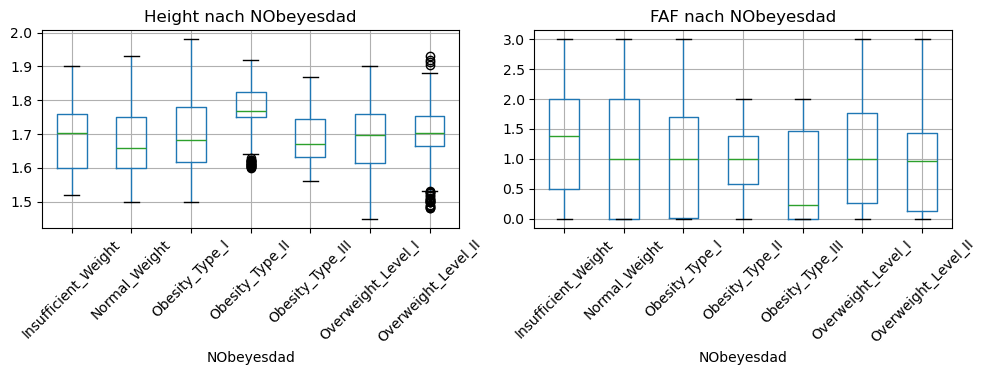

In [249]:
# Beispiel für Classification: Boxplots
target = 'NObeyesdad'
num_cols = ['Height', 'FAF']  # numerische Features
fig, axes = plt.subplots(1, len(num_cols), figsize=(5 * len(num_cols), 4))
if len(num_cols) == 1:
    axes = [axes]
for i, col in enumerate(num_cols):
    df_model.boxplot(column=col, by=target, ax=axes[i])
    axes[i].set_title(f'{col} nach {target}')
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle("")
plt.tight_layout()
plt.show()

In [250]:
# Beispiel für Regression: Scatter Plots
# fig, axes = plt.subplots(1, len(X.columns), figsize=(15, 4))
# for i, col in enumerate(X.columns):
#     axes[i].scatter(df_model[col], y, alpha=0.5)
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Target')
#     axes[i].set_title(f'{col} vs Target')
# plt.tight_layout()
# plt.show()


In [251]:
# Optional: Korrelationsmatrix (für Regression)
# correlation_matrix = df_model.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Korrelationsmatrix')
# plt.show()


**Ihre Beobachtungen:**
- Welche Features scheinen am wichtigsten?
- Gibt es klare Muster?
- ...

---
## 6. Train/Test Split

**Aufgabe:** Teilen Sie Ihre Daten in Trainings- und Testdaten auf.

**Warum?** 
- Training Set (80%): Modell lernt hier
- Test Set (20%): Modell wird hier evaluiert
- Verhindert Overfitting!

**Wichtig:** Testen Sie das Modell NIEMALS auf Trainingsdaten!

In [252]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% für Testing
    random_state=42     # Reproduzierbarkeit
)

print(f"Training Set: {len(X_train)} samples")
print(f"Test Set: {len(X_test)} samples")
print(f"\nTraining Set - Target Verteilung:")
print(y_train.value_counts())  # Für Classification
# print(y_train.describe())  # Für Regression


Training Set: 1669 samples
Test Set: 418 samples

Training Set - Target Verteilung:
NObeyesdad
Obesity_Type_I         281
Obesity_Type_III       264
Overweight_Level_II    241
Obesity_Type_II        233
Normal_Weight          221
Overweight_Level_I     221
Insufficient_Weight    208
Name: count, dtype: int64


---
## 7A. ML Modelle - CLASSIFICATION

**⚠️ Nur für Classification-Probleme! Überspringen Sie diese Sektion, wenn Sie Regression machen.**

**Aufgabe:** Trainieren Sie verschiedene Classification-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Nearest Centroid Classifier (NCC) - sehr einfach
2. K-Nearest Neighbors (KNN) - ähnlich zu NCC, aber flexibler
3. Decision Tree - findet Regeln automatisch
4. Logistic Regression - trotz Namen für Classification!

In [253]:
# Classification Algorithmen importieren
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [254]:
# 1. Nearest Centroid Classifier
print("=== Nearest Centroid Classifier ===")
ncc = NearestCentroid()
ncc.fit(X_train, y_train)
y_pred_ncc = ncc.predict(X_test)
accuracy_ncc = accuracy_score(y_test, y_pred_ncc)
print(f"Accuracy: {accuracy_ncc:.2%}\n")


=== Nearest Centroid Classifier ===
Accuracy: 49.76%



In [255]:
# 2. K-Nearest Neighbors
print("=== K-Nearest Neighbors (KNN) ===")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2%}\n")


=== K-Nearest Neighbors (KNN) ===
Accuracy: 82.78%



In [256]:
# 3. Decision Tree
print("=== Decision Tree ===")
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2%}\n")


=== Decision Tree ===
Accuracy: 80.38%



In [257]:
# 4. Logistic Regression
print("=== Logistic Regression ===")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.2%}\n")


=== Logistic Regression ===
Accuracy: 72.73%




=== Modellvergleich ===
              Model  Accuracy
                KNN  0.827751
      Decision Tree  0.803828
Logistic Regression  0.727273
   Nearest Centroid  0.497608


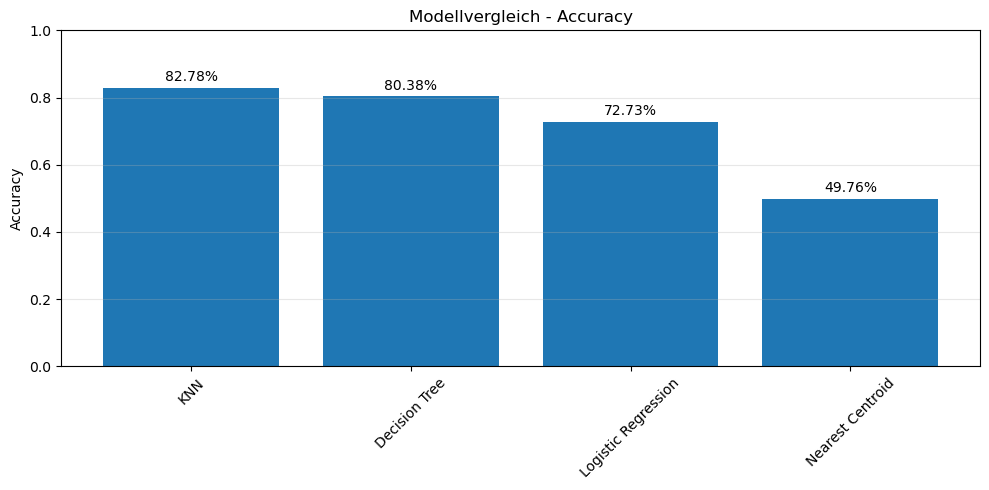

In [258]:
# Modellvergleich
results = pd.DataFrame({
    'Model': ['Nearest Centroid', 'KNN', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [accuracy_ncc, accuracy_knn, accuracy_tree, accuracy_logreg]
})
results = results.sort_values('Accuracy', ascending=False)
print("\n=== Modellvergleich ===")
print(results.to_string(index=False))

# Visualisierung
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Accuracy'])
plt.title('Modellvergleich - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center')
plt.tight_layout()
plt.show()


---
## 7B. ML Modelle - REGRESSION

**⚠️ Nur für Regression-Probleme! Überspringen Sie diese Sektion, wenn Sie Classification gemacht haben.**

**Aufgabe:** Trainieren Sie verschiedene Regression-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Linear Regression - einfache Gerade
2. K-Nearest Neighbors Regressor - Nachbarn-Durchschnitt
3. Decision Tree Regressor - findet nicht-lineare Muster
4. Random Forest Regressor - viele Bäume = robuster

In [ ]:
# Regression Algorithmen importieren
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# 1. Linear Regression
print("=== Linear Regression ===")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2%}\n")


In [ ]:
# 2. K-Nearest Neighbors Regressor
print("=== K-Nearest Neighbors Regressor ===")
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"RMSE: {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2%}\n")


In [ ]:
# 3. Decision Tree Regressor
print("=== Decision Tree Regressor ===")
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"RMSE: {rmse_tree:.2f}")
print(f"R² Score: {r2_tree:.2%}\n")


In [ ]:
# 4. Random Forest Regressor
print("=== Random Forest Regressor ===")
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2%}\n")


In [ ]:
# Modellvergleich
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_knn, rmse_tree, rmse_rf],
    'R² Score': [r2_lr, r2_knn, r2_tree, r2_rf]
})
results = results.sort_values('R² Score', ascending=False)
print("\n=== Modellvergleich ===")
print(results.to_string(index=False))

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# RMSE
ax1.bar(results['Model'], results['RMSE'])
ax1.set_title('Modellvergleich - RMSE (niedriger = besser)')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# R² Score
ax2.bar(results['Model'], results['R² Score'])
ax2.set_title('Modellvergleich - R² Score (höher = besser)')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(results['R² Score']):
    ax2.text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()


---
## 8. Detaillierte Evaluation - Classification

**⚠️ Nur für Classification!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **Accuracy:** Anteil korrekter Vorhersagen
- **Confusion Matrix:** Welche Fehler macht das Modell?
- **Classification Report:** Precision, Recall, F1-Score pro Klasse

In [261]:
# Wählen Sie Ihr bestes Modell aus Sektion 7A
best_model = knn  # Beispiel
y_pred_best = y_pred_knn

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_best))


=== Classification Report ===
                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.93      0.86        59
      Normal_Weight       0.73      0.54      0.62        61
     Obesity_Type_I       0.84      0.84      0.84        70
    Obesity_Type_II       0.98      0.91      0.94        64
   Obesity_Type_III       0.92      1.00      0.96        60
 Overweight_Level_I       0.76      0.80      0.78        55
Overweight_Level_II       0.71      0.76      0.73        49

           accuracy                           0.83       418
          macro avg       0.82      0.83      0.82       418
       weighted avg       0.83      0.83      0.82       418



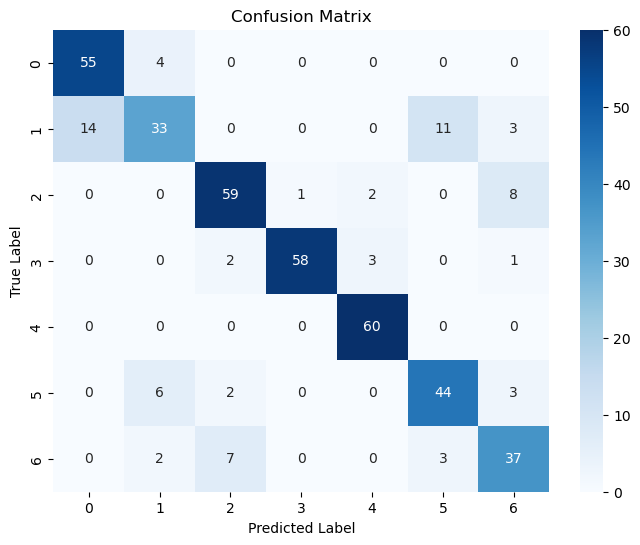

In [262]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**Interpretation der Confusion Matrix:**
- Diagonale: Korrekte Vorhersagen
- Außerhalb der Diagonalen: Fehler
- Welche Klassen werden am häufigsten verwechselt?

---
## 9. Detaillierte Evaluation - Regression

**⚠️ Nur für Regression!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **RMSE (Root Mean Squared Error):** Durchschnittlicher Fehler (in gleicher Einheit wie Target)
- **R² Score:** Wie gut erklärt das Modell die Varianz? (0-1, höher = besser)
- **Residual Plot:** Visualisierung der Fehler

In [263]:
# Wählen Sie Ihr bestes Modell aus Sektion 7B
# best_model = rf  # Beispiel
# y_pred_best = y_pred_rf

# Alle Metriken
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("=== Evaluation Metriken ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2%}")


ValueError: could not convert string to float: 'Obesity_Type_I'

In [ ]:
# Visualisierung: Predicted vs. Actual
plt.figure(figsize=(10, 5))

# Plot 1: Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Predicted vs Actual')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (Fehler)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuals (Fehler)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Interpretation:**
- **Predicted vs Actual:** Punkte sollten nahe der roten Linie liegen
- **Residual Plot:** Fehler sollten zufällig um 0 verteilt sein (kein Muster!)

---
## 10. Feature Importance (Optional)

**Aufgabe:** Finden Sie heraus, welche Features am wichtigsten sind.

**Hinweis:** Funktioniert nur für Decision Trees und Random Forests!

In [ ]:
# Feature Importance für Decision Tree oder Random Forest
# Wählen Sie Ihr Tree-basiertes Modell:
# model_with_importance = tree  # oder rf, tree_reg, etc.

# importances = model_with_importance.feature_importances_
# feature_importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': importances
# }).sort_values('Importance', ascending=False)

# print("=== Feature Importance ===")
# print(feature_importance_df.to_string(index=False))

# Visualisierung
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importance')
# plt.gca().invert_yaxis()
# plt.grid(axis='x', alpha=0.3)
# plt.tight_layout()
# plt.show()


---
## 11. Vorhersagen auf neuen Daten

**Aufgabe:** Machen Sie Vorhersagen für neue, hypothetische Datenpunkte. Sie können z.B. per genAI neue Daten

**Hinweis:** Dies zeigt, wie Ihr Modell in der Praxis verwendet werden könnte!

In [269]:
# Beispiel: Neue Datenpunkte definieren
new_data = pd.DataFrame({
    "Height": [1.81],
    "Age": [22],
    "Weight": [71],
    "FAF": [1.0],
    "family_history_with_overweight": [False]
})

# Vorhersage mit bestem Modell
prediction = best_model.predict(new_data)
print(f"Vorhersage für neue Daten: {prediction[0]}")

# Für Classification: Wahrscheinlichkeiten anzeigen
if hasattr(best_model, 'predict_proba'):
    probabilities = best_model.predict_proba(new_data)
    print(f"Wahrscheinlichkeiten: {probabilities[0]}")


Vorhersage für neue Daten: Overweight_Level_I
Wahrscheinlichkeiten: [0.  0.4 0.  0.  0.  0.6 0. ]


---
## 12. Reflexion und Dokumentation

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen:

### Ihre Reflexion:

**1. Problem-Typ und Forschungsfrage:**
   - Welches Problem haben Sie gelöst (Classification/Regression)?
   - Wie lautete Ihre Forschungsfrage?
   - ...

**2. Features und Target:**
   - Welche Features haben Sie verwendet?
   - Warum haben Sie diese Features gewählt?
   - Was ist Ihre Target-Variable?
   - ...

**3. Modellvergleich:**
   - Welches Modell hat am besten performt?
   - Wie gut ist die Performance (Accuracy/R²)?
   - Überrascht Sie das Ergebnis?
   - ...

**4. Interpretation:**
   - Welche Features sind am wichtigsten?
   - Macht das Sinn für Ihr Problem?
   - Welche Fehler macht das Modell?
   - ...

**5. Herausforderungen:**
   - Welche Schwierigkeiten gab es?
   - Wie haben Sie diese gelöst?
   - Was würden Sie beim nächsten Mal anders machen?
   - ...

**6. Nächste Schritte:**
   - Wie könnten Sie das Modell verbessern?
   - Mehr Features? Besseres Feature Engineering?
   - Andere Algorithmen?
   - Werden Sie ML in Ihrer Streamlit-App verwenden?
   - ...

---
## 13. Modell speichern (Optional)

**Aufgabe:** Speichern Sie Ihr bestes Modell, um es später in Streamlit zu verwenden.

**Hinweis:** Dies ist optional! Sie können auch direkt in Streamlit ein neues Modell trainieren.

In [ ]:
# Modell speichern mit pickle
# import pickle

# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

# print("Modell wurde gespeichert!")

# Später laden:
# with open('best_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)


---
## Zusammenfassung

**Sie haben in dieser Übung:**
- ✅ Ihr ML-Problem identifiziert (Classification/Regression)
- ✅ Features und Target definiert
- ✅ Train/Test Split durchgeführt
- ✅ Mehrere ML-Algorithmen trainiert und verglichen
- ✅ Das beste Modell evaluiert
- ✅ Feature Importance analysiert (optional)
- ✅ Vorhersagen auf neuen Daten gemacht

**Nächste Woche (Woche 10):**
- Machine Learning 2: Fortgeschrittene Evaluation
- Streamlit Einführung: Erste Web-App erstellen

**Tipp für Streamlit:**
- Nicht jedes Projekt braucht ML!
- Visualisierungen und explorative Analysen sind oft wertvoller
- Falls ML passt: Integrieren Sie Vorhersagen in Ihre App